In [3]:
%load_ext autoreload
%autoreload 2 
%cd ~/Dev/imaginedriving

/home/s0001899/Dev/imaginedriving


/home/s0001899/Dev/imaginedriving/.venv/lib/python3.10/site-packages/IPython/core/magics/osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})


In [4]:
from pathlib import Path
from src.diffusion import SDPipe
from src.data import DynamicDataset, read_yaml

In [13]:
pipe = SDPipe(low_mem_mode=True, compile_model=True)

/home/s0001899/Dev/imaginedriving/.venv/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [14]:
configs = {
  "dataset": "pandaset",
  "path": "/home/s0001899/Dev/pandaset",
  "data_getters": {
    "rgb": {
      "camera": "front_camera",
      "height": 1080//4,
      "width": 1920//4
    },
    "meta": {}
  },
  "data_tree": {
    "pandaset": {
      "001": "0:12:"
    }
  }
}

In [15]:

data = DynamicDataset.from_config(configs)

In [16]:
from torch.utils.data import DataLoader
dataloader = DataLoader(data, batch_size=4)

In [17]:
example_batch = next(iter(dataloader))
example_batch["rgb"].shape

torch.Size([4, 3, 270, 480])

In [21]:
import torch
imgs_out = pipe.diffuse_sample(example_batch)

  0%|          | 0/10 [00:00<?, ?it/s]

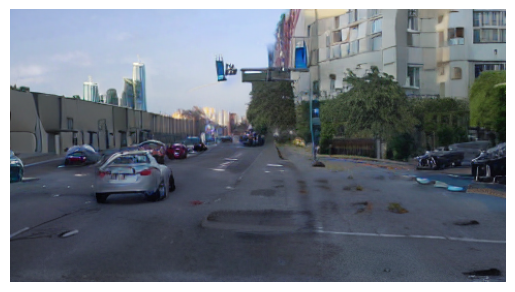

In [26]:
from src.utils import show_img
show_img(imgs_out["rgb"].float()[0])